___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

/Users/kadiryildirim/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import tensorflow as tf

tf.__version__

2023-05-16 09:52:54.431654: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.11.0'

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   geog_germany     10000 non-null  int64  
 10  geog_spain       10000 non-null  int64  
 11  geog_france      10000 non-null  int64  
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB


In [26]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("*****************")
    

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
*****************
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
*****************
Gender
Male      5457
Female    4543
Name: count, dtype: int64
*****************


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [21]:
df.IsActiveMember.value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [22]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [28]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [46]:
# drop unnesessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [49]:
# Converting categorical values to numeric
df["geog_germany"] =  df.Geography.apply(lambda x: 1 if x == "Germany" else 0)
df["geog_spain"] =  df.Geography.apply(lambda x: 1 if x == "Spain" else 0)
df["geog_france"] =  df.Geography.apply(lambda x: 1 if x == "France" else 0)

In [51]:
df["Gender"] =  df.Gender.apply(lambda x: 1 if x == "Female" else 0)


In [52]:
df.drop("Geography", axis=1, inplace=True)

In [53]:
df.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geog_germany,geog_spain,geog_france
0,619,1,42,2,0.000,1,1,1,101348.880,1,0,0,1
1,608,1,41,1,83807.860,1,0,1,112542.580,0,0,1,0


In [54]:
# check target
df.Exited.value_counts()

# binary classification which means we should use sigmoid act function and 1 neuron in the output layer

Exited
0    7963
1    2037
Name: count, dtype: int64

In [55]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'geog_germany', 'geog_spain', 'geog_france'],
      dtype='object')

In [56]:
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,9]]
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geog_germany,geog_spain,geog_france,Exited
0,619,1,42,2,0.000,1,1,1,101348.880,0,0,1,1
1,608,1,41,1,83807.860,1,0,1,112542.580,0,1,0,0
2,502,1,42,8,159660.800,3,1,0,113931.570,0,0,1,1
3,699,1,39,1,0.000,2,0,0,93826.630,0,0,1,0
4,850,1,43,2,125510.820,1,1,1,79084.100,0,1,0,0


Exited
0    7963
1    2037
Name: count, dtype: int64

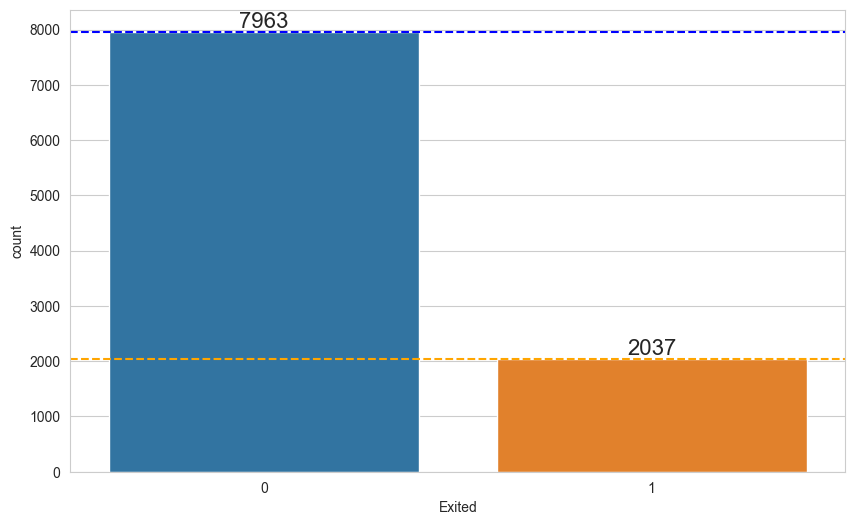

In [38]:
# check class distribution
display(df.Exited.value_counts())
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Exited.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Exited.value_counts()[0], color='blue', linestyle='--');
# imbalanced

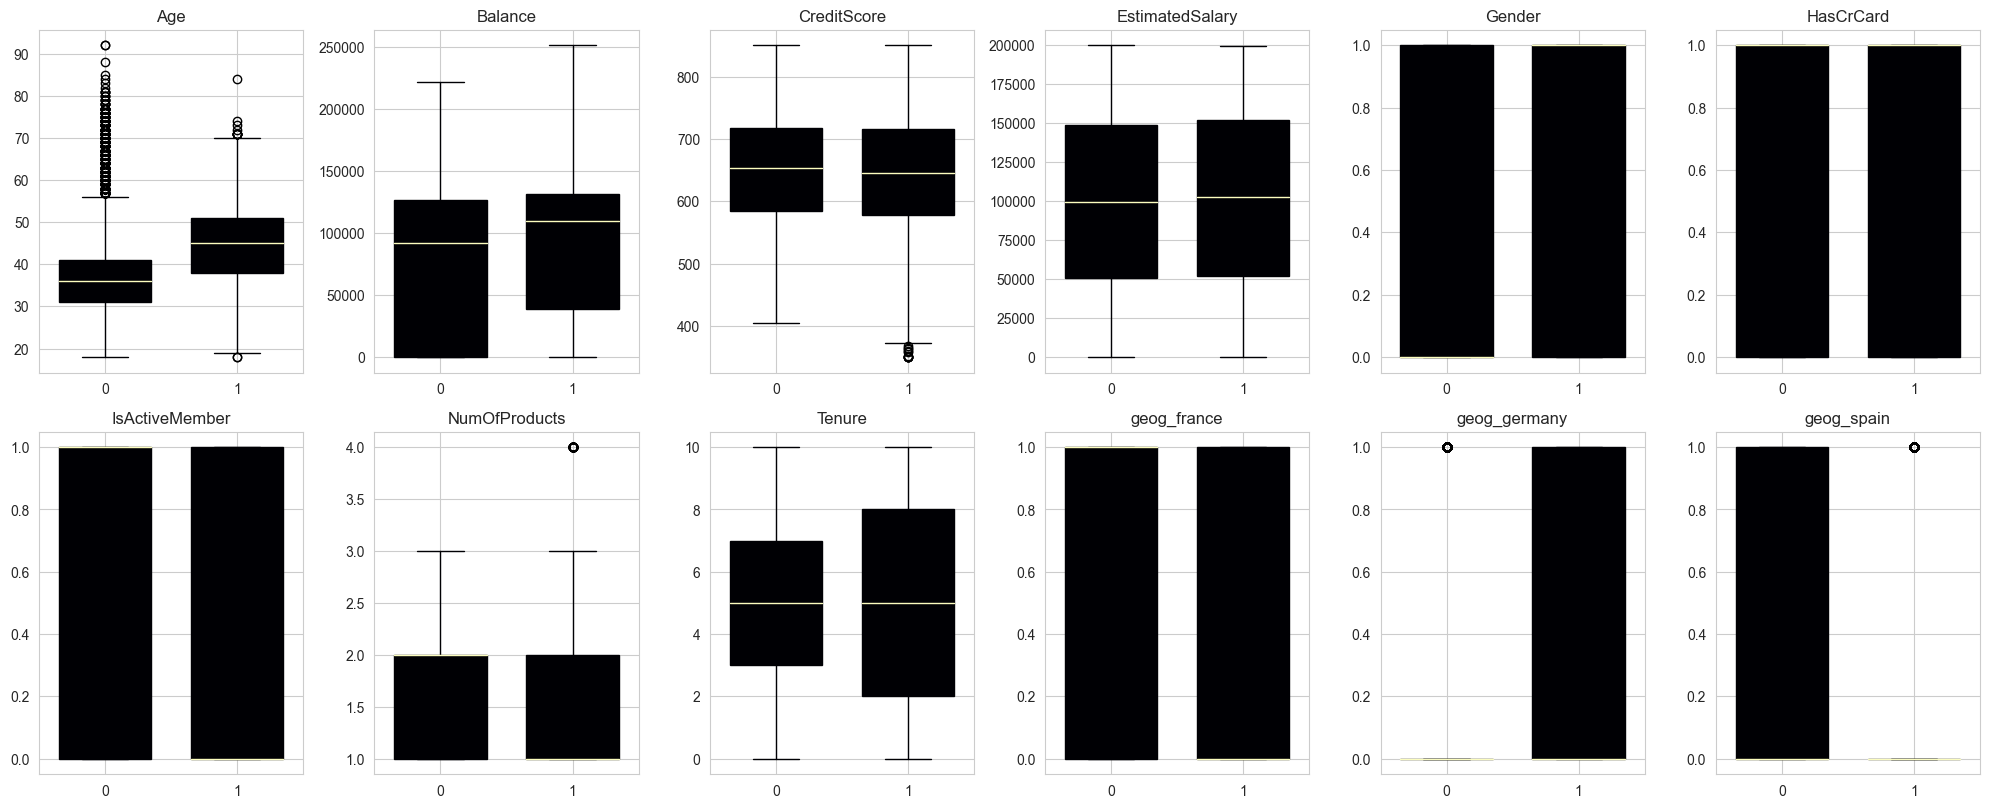

In [57]:
# check outliers with boxplots for target feature

df.plot(kind="box",
        by="Exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

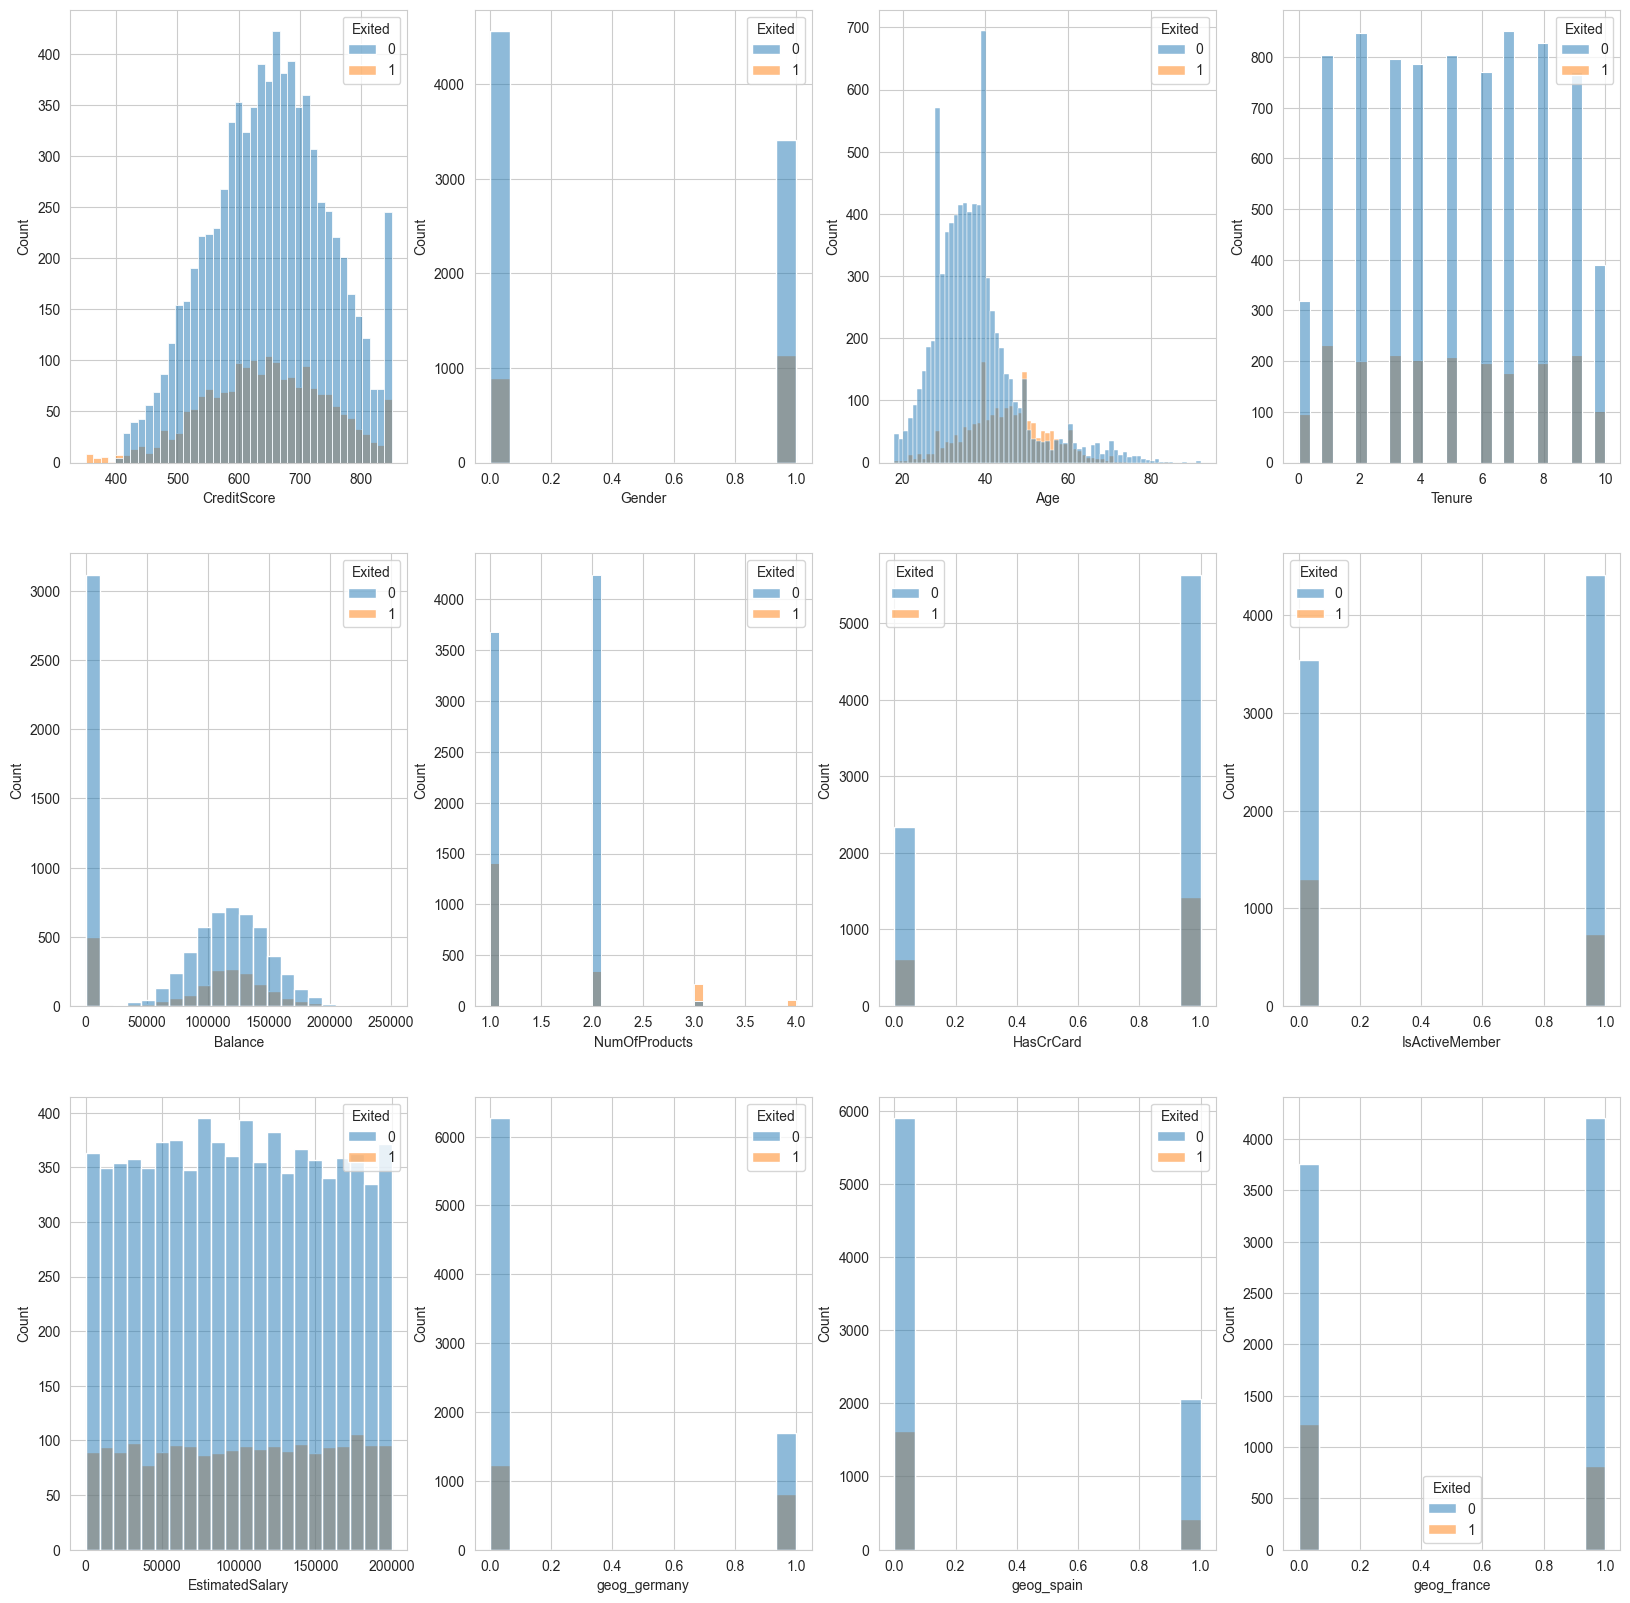

In [58]:
# check corr and heatmap - pair plot

# which features separate the classes better
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(3, 4, idx+1)
    sns.histplot(data=df, x=col, hue='Exited')

In [59]:
# corr
df.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geog_germany,geog_spain,geog_france,Exited
CreditScore,1.000,0.003,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,0.006,0.005,-0.009,-0.027
Gender,0.003,1.000,0.028,-0.015,-0.012,0.022,-0.006,-0.023,0.008,0.025,-0.017,-0.007,0.107
Age,-0.004,0.028,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.047,-0.002,-0.039,0.285
Tenure,0.001,-0.015,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.001,0.004,-0.003,-0.014
Balance,0.006,-0.012,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.401,-0.135,-0.231,0.119
NumOfProducts,0.012,0.022,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.010,0.009,0.001,-0.048
HasCrCard,-0.005,-0.006,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,0.011,-0.013,0.002,-0.007
IsActiveMember,0.026,-0.023,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.020,0.017,0.003,-0.156
EstimatedSalary,-0.001,0.008,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.010,-0.006,-0.003,0.012
geog_germany,0.006,0.025,0.047,-0.001,0.401,-0.010,0.011,-0.020,0.010,1.000,-0.332,-0.580,0.173


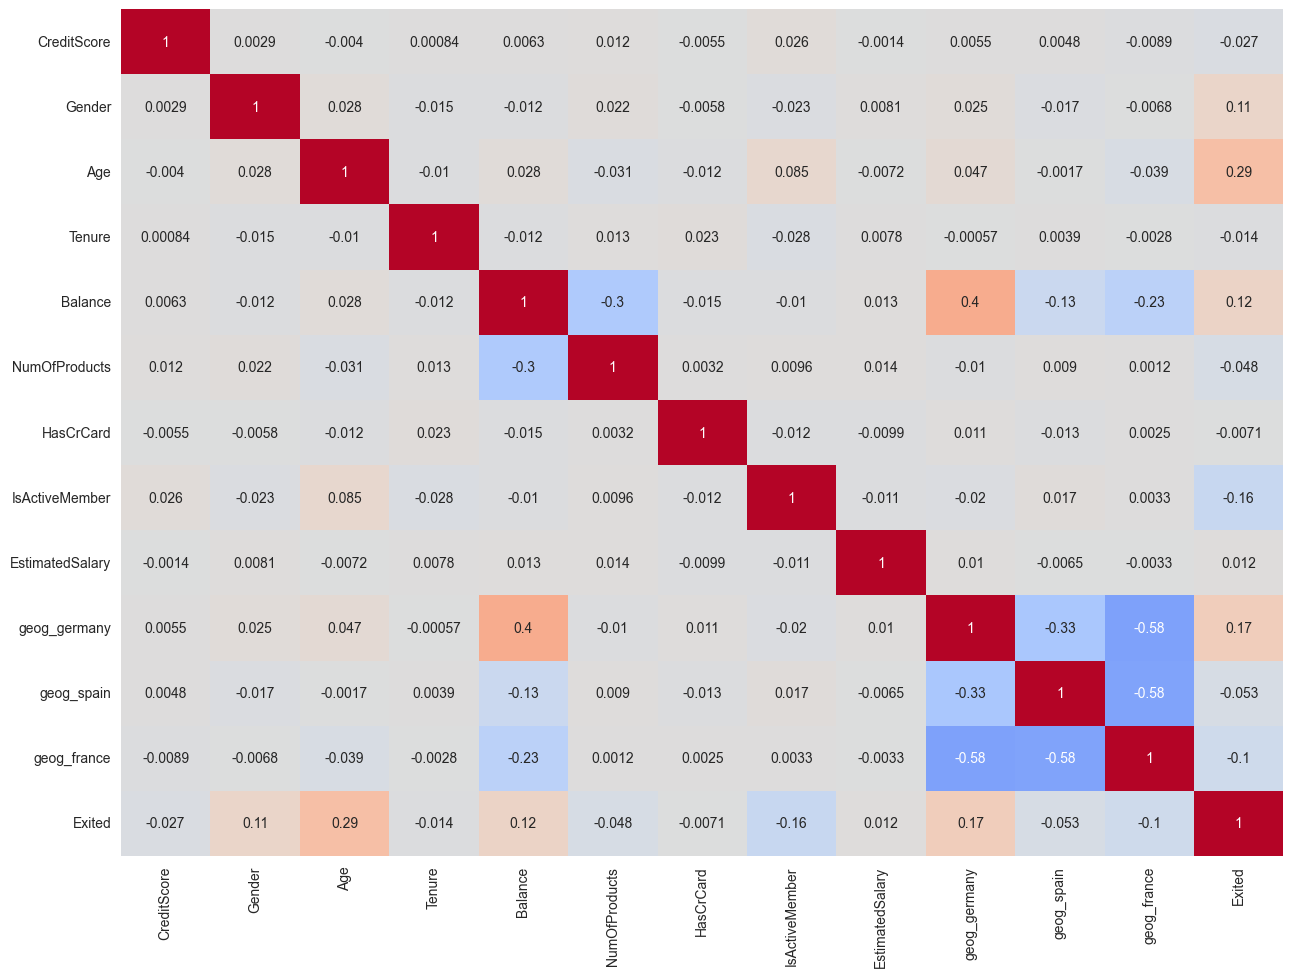

In [60]:
# heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False)
plt.show()

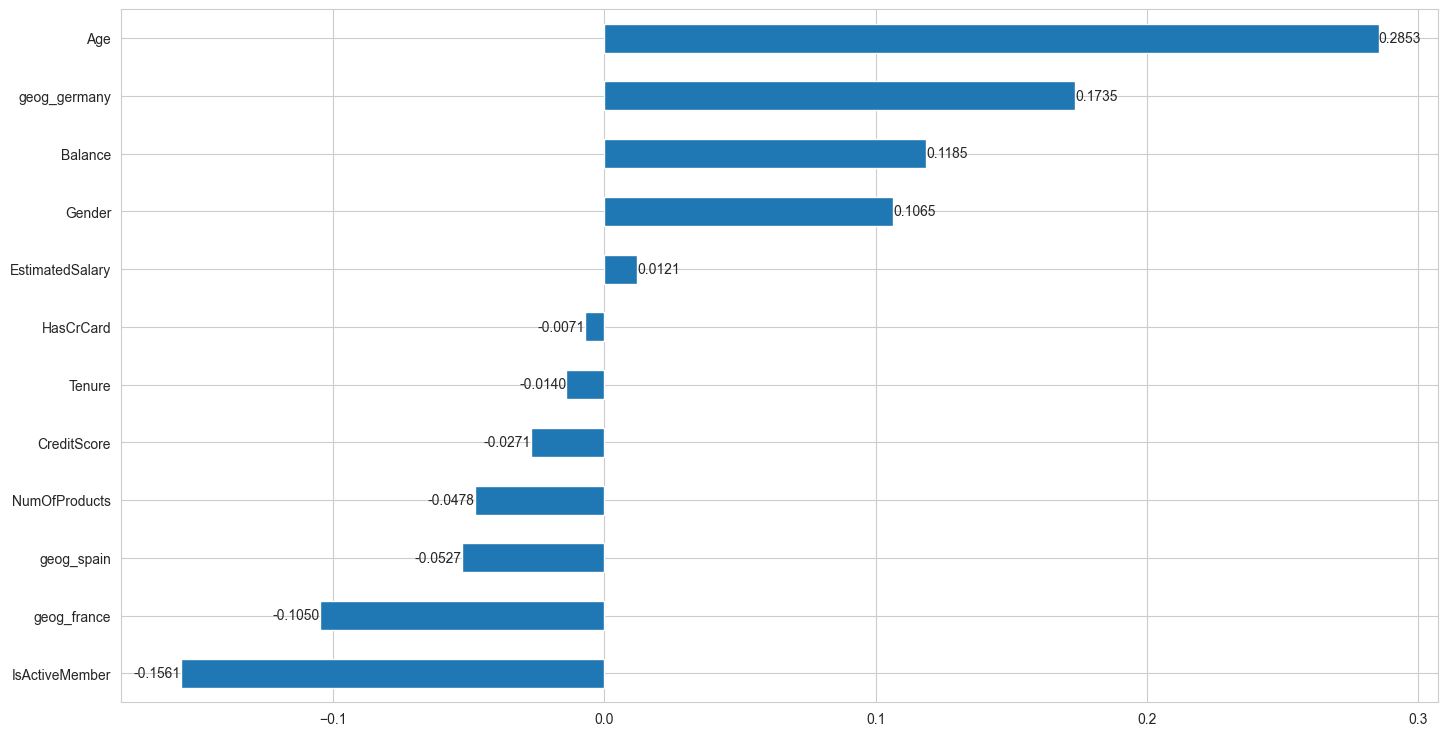

In [62]:
plt.figure(figsize=(17, 9))
ax = df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [65]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [96]:
seed = 42

In [97]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=seed 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve test datasını ayırdık.
# val datayi bu ustte olusturdugumuz train datasi icinden olusturacagiz
X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1, random_state=seed 
)


In [98]:
# create the scaler
scaler = MinMaxScaler()

In [99]:
X_train = scaler.fit_transform(X_train) # fit&transform train data
X_val = scaler.transform(X_val) # transform val data
X_test = scaler.transform(X_test) # transform test data

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [100]:
tf.keras.utils.set_random_seed(seed)


model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))


model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                234       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 4)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(12, 18) dtype=float32, numpy=
 array([[-2.14821666e-01, -1.35121867e-01,  4.76650476e-01,
         -7.83939600e-01, -2.45335147e-01,  6.62362874e-02,
          1.12822011e-01,  1.43983923e-02, -2.58998215e-01,
          4.17723745e-01, -5.87749004e-01,  7.40809023e-01,
         -4.98530060e-01,  4.59852785e-01,  2.20835820e-01,
         -6.89149834e-03,  4.85399067e-02,  1.37424782e-01],
        [ 1.84479386e-01, -6.36123240e-01, -3.46619457e-01,
          5.17117918e-01, -2.17471942e-01, -1.52794451e-01,
         -9.31250211e-03, -8.31984871e-05,  4.87022847e-01,
         -1.72863707e-01,  1.89077392e-01,  5.05552769e-01,
          3.30982178e-01,  3.09936017e-01, -1.71235800e-01,
          2.33226657e-01,  6.52550384e-02, -7.08633289e-02],
        [ 2.46551245e-01, -6.35059997e-02, -1.17049313e+00,
         -5.53321838e-01,  6.52653813e-01,  1.34609032e+00,
         -9.83580649e-02, -8.63146856e-02, -1.57909417e+00,
          1.19345379e+00, -4.8

In [101]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), # x_val, y_val that we assigned before as validation_data
          batch_size=128, 
          epochs=50,
          verbose=1)

Epoch 1/50
64/64 [==============================] - 1s 6ms/step - loss: 0.6978 - accuracy: 0.4865 - val_loss: 0.6745 - val_accuracy: 0.7967
Epoch 2/50
64/64 [==============================] - 0s 5ms/step - loss: 0.6605 - accuracy: 0.7963 - val_loss: 0.6422 - val_accuracy: 0.7967
Epoch 3/50
64/64 [==============================] - 0s 3ms/step - loss: 0.6079 - accuracy: 0.7963 - val_loss: 0.5618 - val_accuracy: 0.7967
Epoch 4/50
64/64 [==============================] - 0s 3ms/step - loss: 0.5249 - accuracy: 0.7963 - val_loss: 0.5025 - val_accuracy: 0.7967
Epoch 5/50
64/64 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7963 - val_loss: 0.4884 - val_accuracy: 0.7967
Epoch 6/50
64/64 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.7986 - val_loss: 0.4781 - val_accuracy: 0.8022
Epoch 7/50
64/64 [==============================] - 0s 3ms/step - loss: 0.4623 - accuracy: 0.8022 - val_loss: 0.4716 - val_accuracy: 0.7989
Epoch 8/50
64/64 [==

In [102]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.698,0.487,0.675,0.797
1,0.660,0.796,0.642,0.797
2,0.608,0.796,0.562,0.797
3,0.525,0.796,0.502,0.797
4,0.492,0.796,0.488,0.797


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

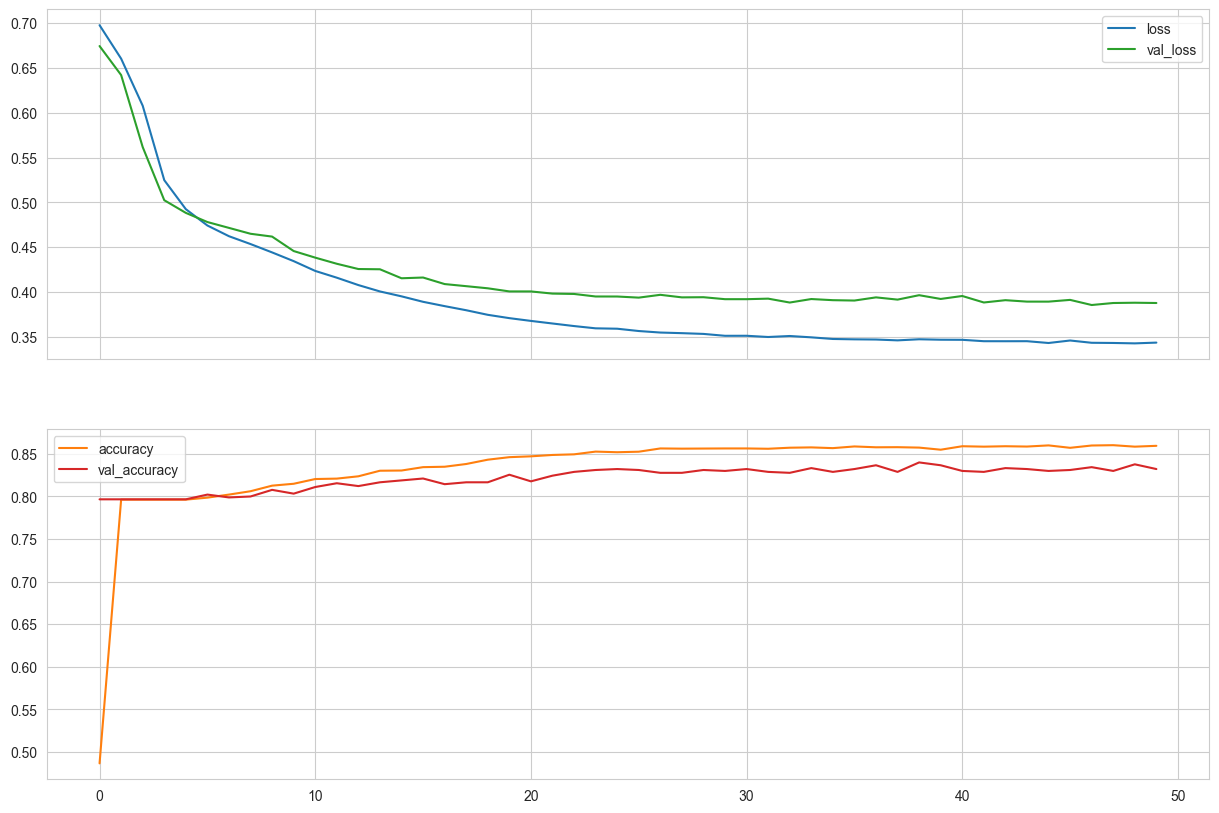

In [104]:
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [105]:
model.evaluate(X_test, y_test, verbose=0)

[0.3569875955581665, 0.8519999980926514]

In [106]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3569875955581665
accuracy :  0.8519999980926514


In [107]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# burada predict doğrudan çalışmıyor bize olasılıklar döndürdüğü için 0.5'den yukarıda olanları 1 classına ataması için
# model.predict(X_test) > 0.5 şeklinde kullanıyoruz .

32/32 [==============================] - 0s 3ms/step
[[768  28]
 [120  84]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       796
           1       0.75      0.41      0.53       204

    accuracy                           0.85      1000
   macro avg       0.81      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [86]:
from sklearn.utils import class_weight

In [128]:
# Calculate weights using sklearn
sklearn_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y=y_train)
sklearn_weights

array([0.62790698, 2.45454545])

In [129]:
# Transform array to dictionary
sklearn_weights = dict(enumerate(sklearn_weights))
sklearn_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [197]:
tf.keras.utils.set_random_seed(seed)


balanced_model = Sequential()

balanced_model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
balanced_model.add(Dense(9, activation = "relu"))
balanced_model.add(Dense(4, activation = "relu"))
balanced_model.add(Dense(1, activation = "sigmoid"))


balanced_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [131]:
balanced_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 18)                234       
                                                                 
 dense_29 (Dense)            (None, 9)                 171       
                                                                 
 dense_30 (Dense)            (None, 4)                 40        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


In [132]:
balanced_model.weights

[<tf.Variable 'dense_28/kernel:0' shape=(12, 18) dtype=float32, numpy=
 array([[ 3.20374072e-01,  1.45459354e-01, -1.26372933e-01,
          4.02482867e-01, -3.77393603e-01,  1.36250138e-01,
          4.20827866e-01, -2.97028422e-01,  2.12777853e-02,
          1.16954923e-01, -3.69918734e-01, -4.79793251e-02,
          4.16833222e-01, -2.65277326e-02,  2.63532996e-03,
          2.37618923e-01, -4.30371583e-01, -2.75142878e-01],
        [ 1.27380490e-02, -3.87801498e-01, -4.13542897e-01,
          3.11230719e-01,  3.71570051e-01, -2.12389946e-01,
          3.21575105e-01, -3.33196878e-01, -3.37329507e-02,
          5.61001301e-02,  5.96510172e-02, -2.68183231e-01,
         -2.59658724e-01,  4.37521458e-01, -3.48922342e-01,
         -5.04338145e-02, -2.10111186e-01, -3.38968873e-01],
        [ 2.08529413e-01, -2.84123182e-01,  1.62155867e-01,
          1.34538829e-01, -4.09083456e-01,  5.69176078e-02,
         -1.48366064e-01, -1.01207316e-01,  4.06536281e-01,
         -8.01459849e-02,  

In [198]:
balanced_model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), # x_val, y_val that we assigned before as validation_data
          batch_size=128, 
          epochs=500,
          verbose=1, class_weight=sklearn_weights)


Epoch 1/500
64/64 [==============================] - 1s 5ms/step - loss: 0.6875 - recall: 0.9952 - val_loss: 0.7171 - val_recall: 0.9781
Epoch 2/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6728 - recall: 0.9079 - val_loss: 0.7151 - val_recall: 0.7705
Epoch 3/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6585 - recall: 0.7503 - val_loss: 0.7201 - val_recall: 0.7432
Epoch 4/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6469 - recall: 0.7255 - val_loss: 0.7287 - val_recall: 0.7432
Epoch 5/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6364 - recall: 0.7188 - val_loss: 0.7005 - val_recall: 0.6885
Epoch 6/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6256 - recall: 0.7370 - val_loss: 0.6800 - val_recall: 0.6667
Epoch 7/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6156 - recall: 0.7200 - val_loss: 0.6680 - val_recall: 0.6612
Epoch 8/500
64/64 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [199]:
loss_df_balanced = pd.DataFrame(balanced_model.history.history)

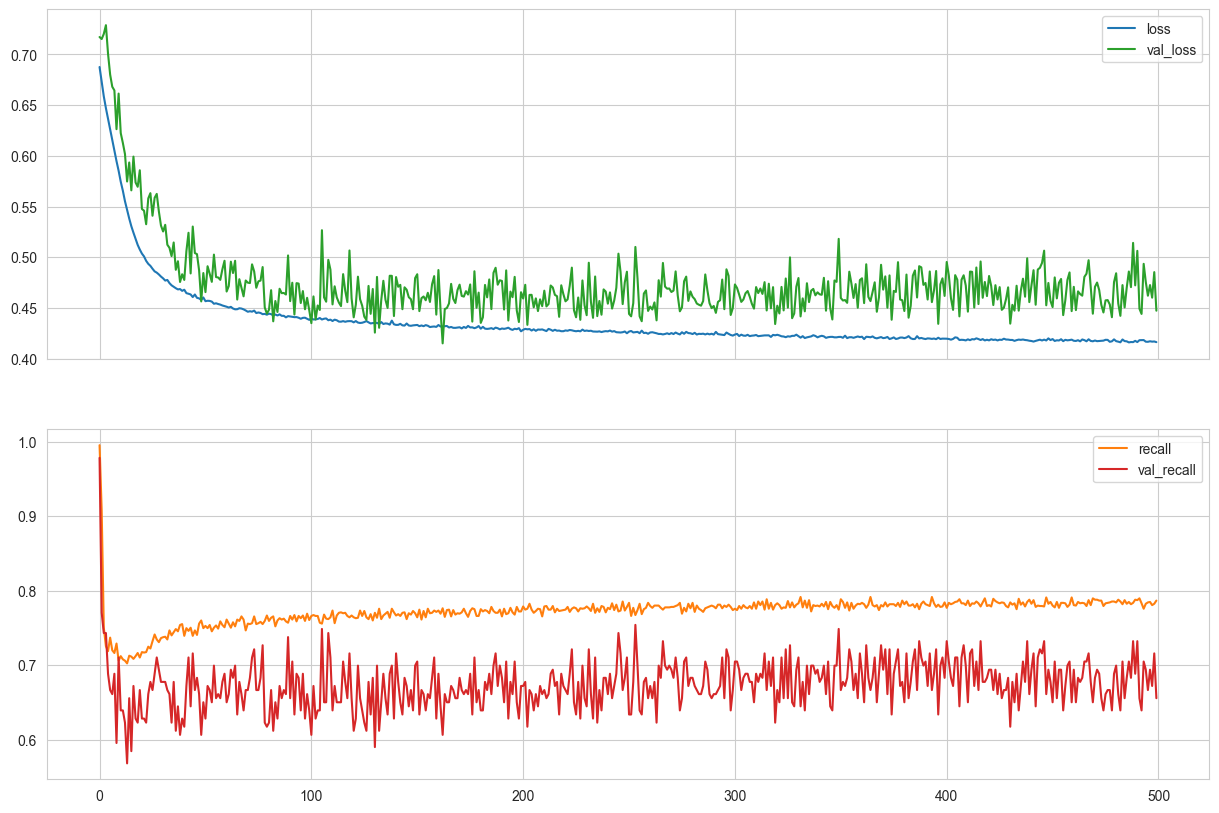

In [200]:
loss_df_balanced.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [201]:
y_pred = balanced_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[660 136]
 [ 63 141]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       796
           1       0.51      0.69      0.59       204

    accuracy                           0.80      1000
   macro avg       0.71      0.76      0.73      1000
weighted avg       0.83      0.80      0.81      1000



32/32 [==============================] - 0s 938us/step


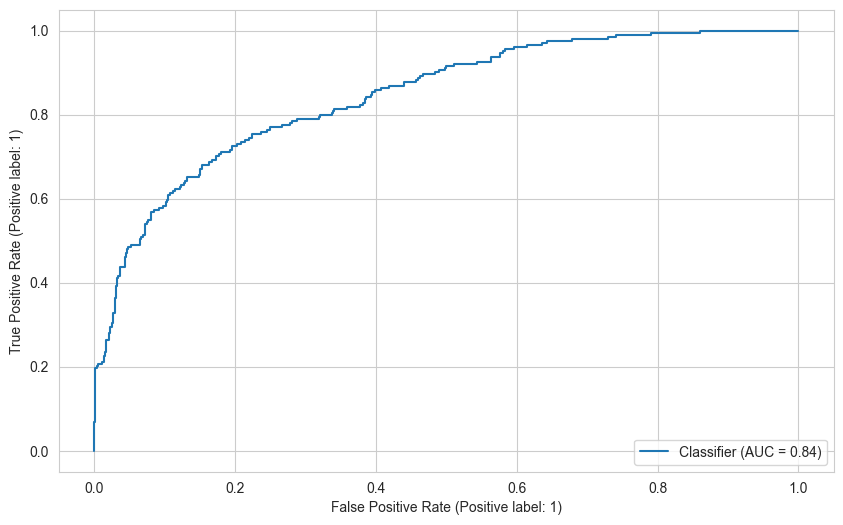

In [202]:
# PC duzelt
y_pred_proba = balanced_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [138]:
roc_auc_score(y_test, y_pred_proba)

0.8433712681052321

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [143]:
from tensorflow.keras.optimizers import Adam

In [148]:
tf.keras.utils.set_random_seed(seed)


lr_balanced_model = Sequential()

lr_balanced_model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
lr_balanced_model.add(Dense(9, activation = "relu"))
lr_balanced_model.add(Dense(4, activation = "relu"))
lr_balanced_model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.005)

lr_balanced_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [149]:
lr_balanced_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    verbose=1
)

Epoch 1/250
64/64 [==============================] - 1s 7ms/step - loss: 0.6326 - recall: 0.1115 - val_loss: 0.5113 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4808 - recall: 0.0000e+00 - val_loss: 0.4763 - val_recall: 0.0000e+00
Epoch 3/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4505 - recall: 0.0533 - val_loss: 0.4537 - val_recall: 0.1311
Epoch 4/250
64/64 [==============================] - 0s 4ms/step - loss: 0.4353 - recall: 0.2139 - val_loss: 0.4462 - val_recall: 0.2295
Epoch 5/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4237 - recall: 0.2600 - val_loss: 0.4366 - val_recall: 0.2350
Epoch 6/250
64/64 [==============================] - 0s 4ms/step - loss: 0.4137 - recall: 0.2848 - val_loss: 0.4321 - val_recall: 0.3060
Epoch 7/250
64/64 [==============================] - 0s 6ms/step - loss: 0.4059 - recall: 0.3200 - val_loss: 0.4265 - val_recall: 0.3005
Epoch 8/250
64/64 [==========

**Evaluate model**

In [150]:
loss_lr_balanced = pd.DataFrame(lr_balanced_model.history.history)

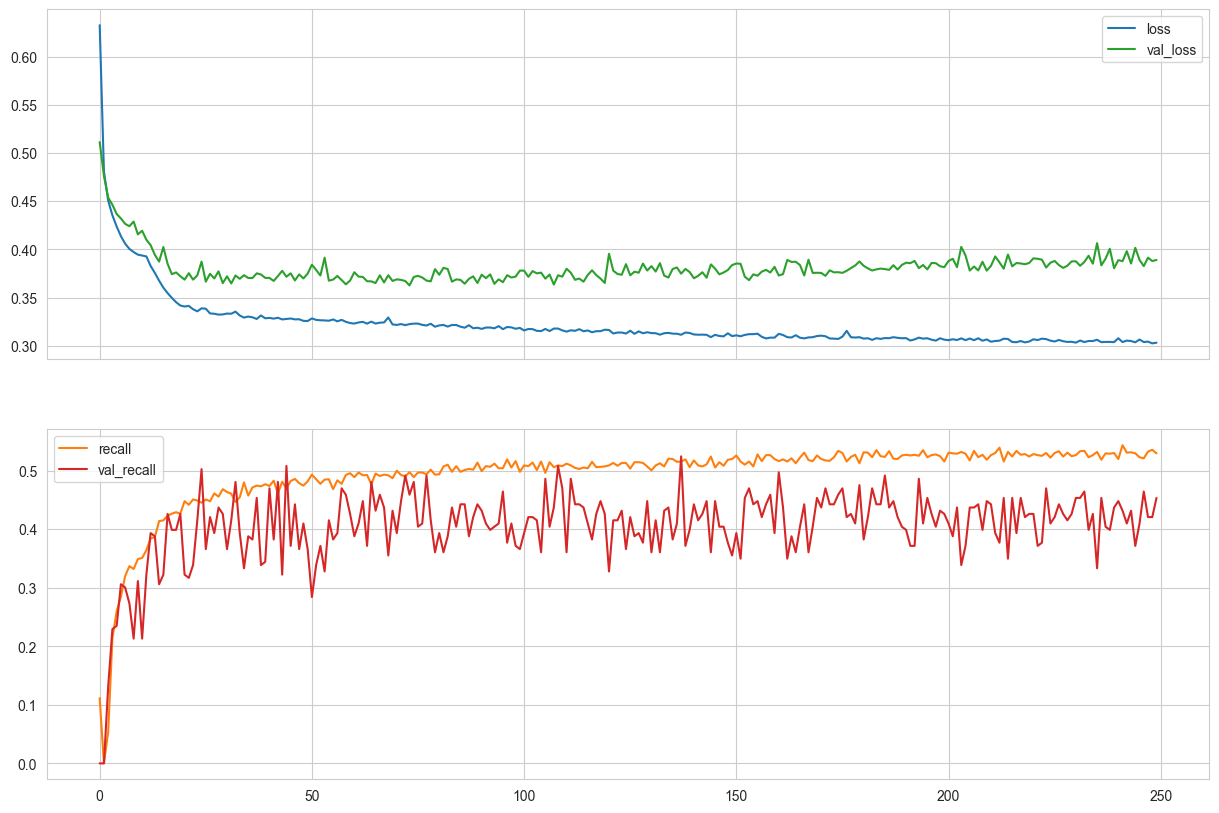

In [151]:
loss_lr_balanced.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [152]:
y_pred = lr_balanced_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[753  43]
 [ 98 106]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.71      0.52      0.60       204

    accuracy                           0.86      1000
   macro avg       0.80      0.73      0.76      1000
weighted avg       0.85      0.86      0.85      1000



### Add Dropout Layer

In [153]:
from tensorflow.keras.layers import Dropout

In [158]:
tf.keras.utils.set_random_seed(seed)

drop_model = Sequential()

drop_model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
drop_model.add(Dropout(0.25))

drop_model.add(Dense(9, activation="relu"))
drop_model.add(Dropout(0.25))

drop_model.add(Dense(4, activation="relu"))
drop_model.add(Dropout(0.25))

drop_model.add(Dense(1, activation="sigmoid"))


drop_model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["Recall"])


In [159]:
drop_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    verbose=1  
)

Epoch 1/250
64/64 [==============================] - 1s 7ms/step - loss: 0.7083 - recall: 0.5382 - val_loss: 0.6747 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 3ms/step - loss: 0.6661 - recall: 0.0236 - val_loss: 0.6511 - val_recall: 0.0000e+00
Epoch 3/250
64/64 [==============================] - 0s 3ms/step - loss: 0.6327 - recall: 6.0606e-04 - val_loss: 0.6066 - val_recall: 0.0000e+00
Epoch 4/250
64/64 [==============================] - 0s 3ms/step - loss: 0.5729 - recall: 0.0000e+00 - val_loss: 0.5219 - val_recall: 0.0000e+00
Epoch 5/250
64/64 [==============================] - 0s 3ms/step - loss: 0.5419 - recall: 6.0606e-04 - val_loss: 0.5070 - val_recall: 0.0000e+00
Epoch 6/250
64/64 [==============================] - 0s 3ms/step - loss: 0.5291 - recall: 0.0000e+00 - val_loss: 0.4964 - val_recall: 0.0000e+00
Epoch 7/250
64/64 [==============================] - 0s 3ms/step - loss: 0.5275 - recall: 6.0606e-04 - val_loss: 0.4900 - val_recall: 0.00

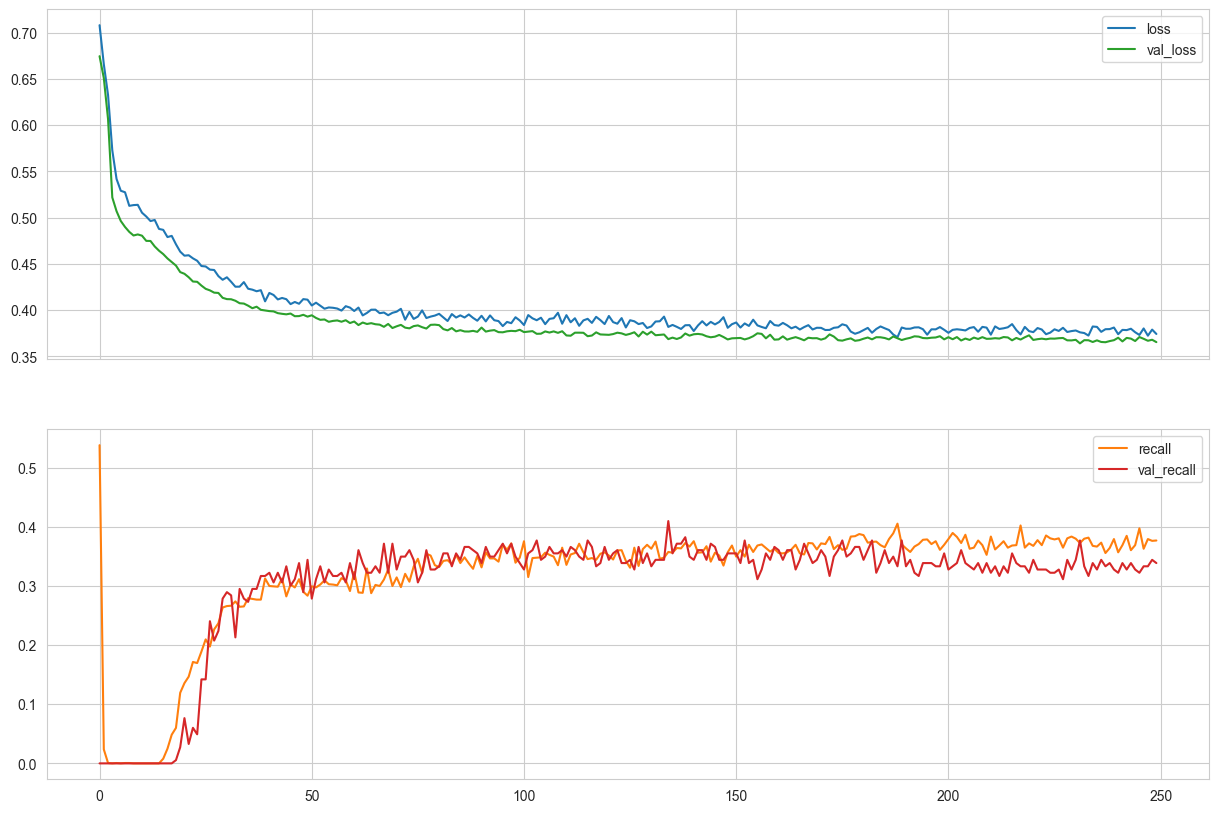

In [160]:
loss_df = pd.DataFrame(drop_model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [161]:
y_pred = drop_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[776  20]
 [124  80]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.92       796
           1       0.80      0.39      0.53       204

    accuracy                           0.86      1000
   macro avg       0.83      0.68      0.72      1000
weighted avg       0.85      0.86      0.84      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [162]:
from tensorflow.keras.callbacks import EarlyStopping

In [258]:
tf.keras.utils.set_random_seed(seed)

early_model = Sequential()

early_model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
early_model.add(Dense(9, activation = "relu"))
early_model.add(Dense(4, activation = "relu"))
early_model.add(Dense(1, activation = "sigmoid"))

early_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])


In [259]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)


In [260]:
early_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/250
71/71 [==============================] - 1s 7ms/step - loss: 1988.2400 - recall: 0.7981 - val_loss: 0.6935 - val_recall: 0.6011
Epoch 2/250
71/71 [==============================] - 0s 4ms/step - loss: 177.9112 - recall: 0.3355 - val_loss: 0.6820 - val_recall: 0.2350
Epoch 3/250
71/71 [==============================] - 0s 4ms/step - loss: 32.7068 - recall: 0.2057 - val_loss: 0.6802 - val_recall: 0.1913
Epoch 4/250
71/71 [==============================] - 0s 3ms/step - loss: 30.0717 - recall: 0.2177 - val_loss: 0.6795 - val_recall: 0.1967
Epoch 5/250
71/71 [==============================] - 0s 4ms/step - loss: 26.9329 - recall: 0.2100 - val_loss: 0.6787 - val_recall: 0.1858
Epoch 6/250
71/71 [==============================] - 0s 3ms/step - loss: 21.1813 - recall: 0.2144 - val_loss: 0.6788 - val_recall: 0.2022
Epoch 7/250
71/71 [==============================] - 0s 4ms/step - loss: 15.7150 - recall: 0.2106 - val_loss: 0.6790 - val_recall: 0.2131
Epoch 8/250
71/71 [============

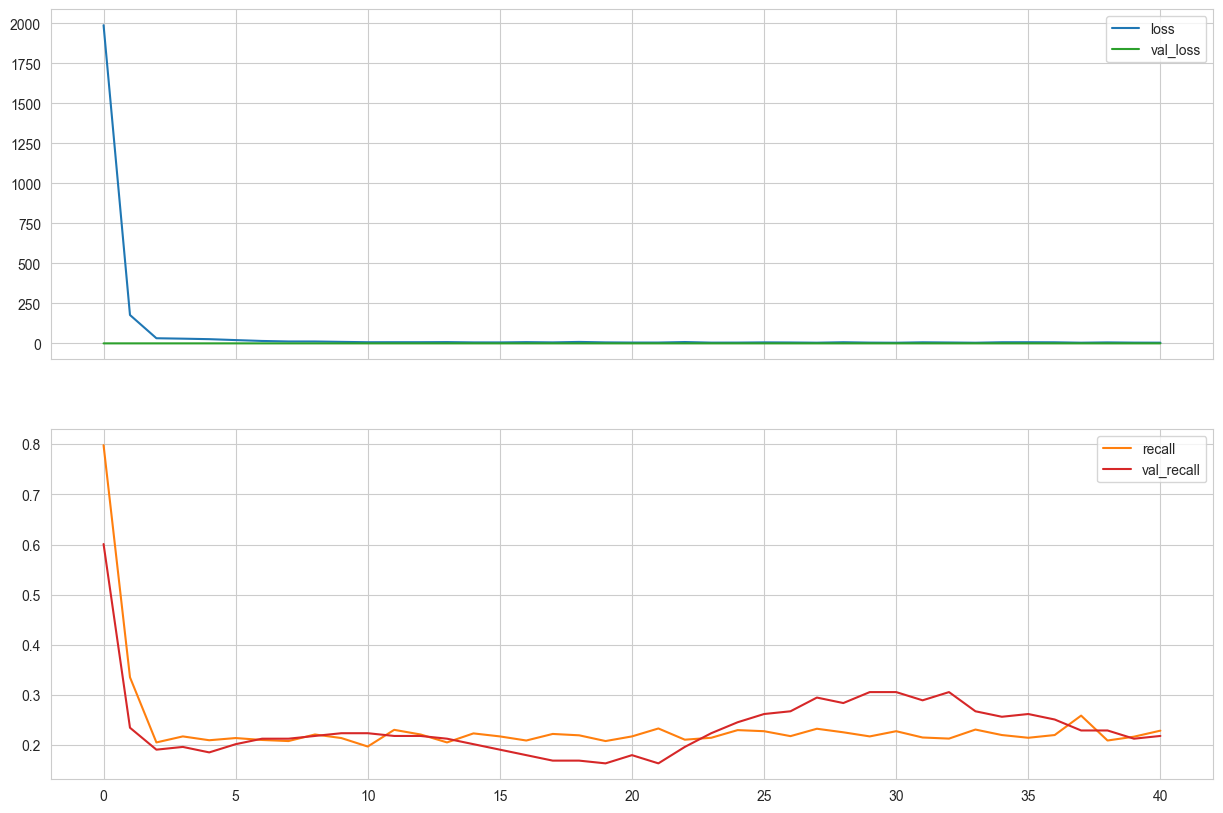

In [261]:
loss_df = pd.DataFrame(early_model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [262]:
y_pred = early_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[746  50]
 [184  20]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       796
           1       0.29      0.10      0.15       204

    accuracy                           0.77      1000
   macro avg       0.54      0.52      0.51      1000
weighted avg       0.70      0.77      0.72      1000



#### Monitor the "val_recall" as metric

In [263]:
tf.keras.utils.set_random_seed(seed)

early_model = Sequential()

early_model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
early_model.add(Dense(9, activation = "relu"))
early_model.add(Dense(4, activation = "relu"))
early_model.add(Dense(1, activation = "sigmoid"))

early_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])


In [264]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 50, restore_best_weights = True)

In [265]:
early_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/250
71/71 [==============================] - 1s 6ms/step - loss: 1988.2400 - recall: 0.7981 - val_loss: 0.6935 - val_recall: 0.6011
Epoch 2/250
71/71 [==============================] - 0s 4ms/step - loss: 177.9112 - recall: 0.3355 - val_loss: 0.6820 - val_recall: 0.2350
Epoch 3/250
71/71 [==============================] - 0s 5ms/step - loss: 32.7068 - recall: 0.2057 - val_loss: 0.6802 - val_recall: 0.1913
Epoch 4/250
71/71 [==============================] - 0s 3ms/step - loss: 30.0717 - recall: 0.2177 - val_loss: 0.6795 - val_recall: 0.1967
Epoch 5/250
71/71 [==============================] - 0s 3ms/step - loss: 26.9329 - recall: 0.2100 - val_loss: 0.6787 - val_recall: 0.1858
Epoch 6/250
71/71 [==============================] - 0s 3ms/step - loss: 21.1813 - recall: 0.2144 - val_loss: 0.6788 - val_recall: 0.2022
Epoch 7/250
71/71 [==============================] - 0s 5ms/step - loss: 15.7150 - recall: 0.2106 - val_loss: 0.6790 - val_recall: 0.2131
Epoch 8/250
71/71 [============

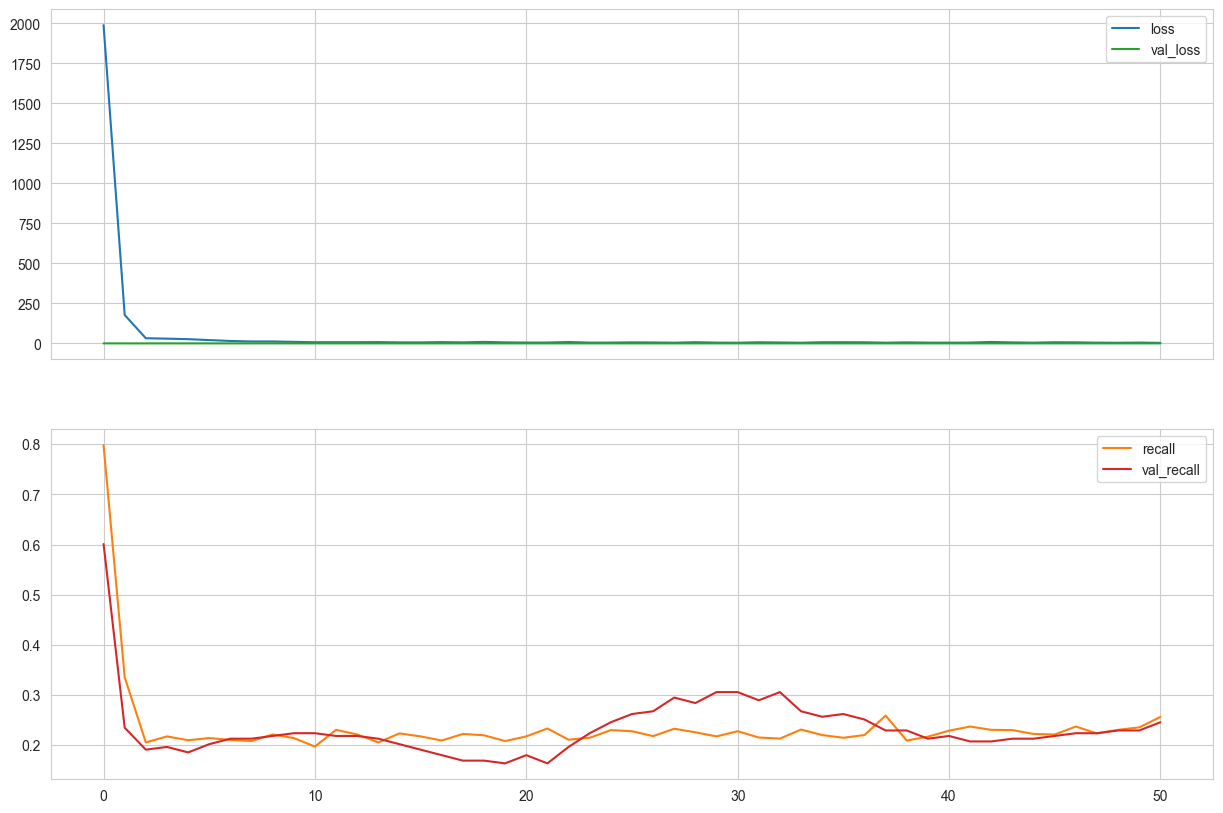

In [266]:
loss_df = pd.DataFrame(early_model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [267]:
y_pred = early_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[440 356]
 [139  65]]
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       796
           1       0.15      0.32      0.21       204

    accuracy                           0.51      1000
   macro avg       0.46      0.44      0.42      1000
weighted avg       0.64      0.50      0.55      1000



## Optuna

In [174]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [175]:
import optuna

In [179]:
from tensorflow.keras.regularizers import l1, l2, L1L2

In [176]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [240]:
trial_metric = "Recall"
batch_size = 128


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 18, 36) 
    n_units2 = trial.suggest_int("n_units2", 18, 36)  
    n_units3 = trial.suggest_int("n_units3", 18, 36)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    tf.keras.utils.set_random_seed(seed)
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   


    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 2) # mimarinin içerisinde direk veremediğimiz bir hyperparametre-->(class_weight)
    w1 = trial.suggest_loguniform("w1", 0.01, 5) # daha var, bunu fit içerisinde belirtebiliyoruz ondan dolayı burada tanımladık
                                                 # denenmesi için.
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=500,
        callbacks=[early_stop],
        class_weight={0 :w0, 1:w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    if score > 0.85: # herhangi bir classin skorlari kotu geldiginde bu threshold artirilabilip azaltilabilir
        score = score * 0
    return score

In [241]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=15) # 15 trials denenecek istersek daha fazla da yazabiliriz.optimize edeceği :def objective
display(study.best_params)

[I 2023-05-17 13:18:07,598] A new study created in memory with name: no-name-56a425ac-d974-46d4-85eb-68e333eb3c21


Restoring model weights from the end of the best epoch: 101.
Epoch 126: early stopping


[I 2023-05-17 13:18:50,456] Trial 0 finished with value: 0.6225489974021912 and parameters: {'n_units1': 32, 'n_units2': 24, 'n_units3': 30, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.00022065185329799795, 'regularizer1': 0.000853308911662971, 'regularizer2': 4.641624421920493e-05, 'dropout': 0.3, 'w0': 0.23022953977278593, 'w1': 2.301989612154612}. Best is trial 0 with value: 0.6225489974021912.


Restoring model weights from the end of the best epoch: 14.
Epoch 39: early stopping


[I 2023-05-17 13:19:02,836] Trial 1 finished with value: 0.7401960492134094 and parameters: {'n_units1': 30, 'n_units2': 28, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.0002678115600601119, 'regularizer1': 0.00016976790677090446, 'regularizer2': 0.000765581298348113, 'dropout': 0, 'w0': 1.321724436081455, 'w1': 1.3195439912548905}. Best is trial 1 with value: 0.7401960492134094.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 13:19:10,159] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 33, 'n_units2': 35, 'n_units3': 20, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.01745931898169039, 'regularizer1': 0.00035638719489449323, 'regularizer2': 1.4172240198844853e-05, 'dropout': 0, 'w0': 0.014753323221008866, 'w1': 2.517875866322863}. Best is trial 1 with value: 0.7401960492134094.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 13:19:22,669] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 20, 'n_units2': 30, 'n_units3': 22, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.0012451701892864338, 'regularizer1': 1.3137339246604873e-05, 'regularizer2': 7.770810108351079e-05, 'dropout': 0.3, 'w0': 0.09668692762247119, 'w1': 4.195432706078368}. Best is trial 1 with value: 0.7401960492134094.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 13:19:29,756] Trial 4 finished with value: 0.0 and parameters: {'n_units1': 19, 'n_units2': 33, 'n_units3': 24, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.0044298182548125065, 'regularizer1': 1.621324902861216e-05, 'regularizer2': 0.0002804169689162013, 'dropout': 0.5, 'w0': 1.9668087952678543, 'w1': 2.8730158812178797}. Best is trial 1 with value: 0.7401960492134094.


Restoring model weights from the end of the best epoch: 2.
Epoch 27: early stopping


[I 2023-05-17 13:19:34,576] Trial 5 finished with value: 0.12745098769664764 and parameters: {'n_units1': 21, 'n_units2': 29, 'n_units3': 24, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.0017393335124934678, 'regularizer1': 0.00014084501411273524, 'regularizer2': 4.1958851578085074e-05, 'dropout': 0, 'w0': 0.5957627827284614, 'w1': 0.031269973768445605}. Best is trial 1 with value: 0.7401960492134094.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 13:19:39,706] Trial 6 finished with value: 0.06862745434045792 and parameters: {'n_units1': 22, 'n_units2': 24, 'n_units3': 31, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.008637653300346894, 'regularizer1': 0.00029310082957928203, 'regularizer2': 2.6293138250622353e-05, 'dropout': 0, 'w0': 0.05627708434399391, 'w1': 0.03227319608447041}. Best is trial 1 with value: 0.7401960492134094.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 13:19:45,587] Trial 7 finished with value: 0.0049019609577953815 and parameters: {'n_units1': 32, 'n_units2': 31, 'n_units3': 25, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 1.0530684570184374e-05, 'regularizer1': 4.763353764410211e-05, 'regularizer2': 0.00010173546487273125, 'dropout': 0.5, 'w0': 0.36557731242069585, 'w1': 0.5466224931457627}. Best is trial 1 with value: 0.7401960492134094.


Restoring model weights from the end of the best epoch: 12.
Epoch 37: early stopping


[I 2023-05-17 13:19:57,676] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 23, 'n_units2': 23, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.00628970293922562, 'regularizer1': 0.00020622699244312017, 'regularizer2': 6.759927253363128e-05, 'dropout': 0, 'w0': 0.1460630582124827, 'w1': 1.1791802453379645}. Best is trial 1 with value: 0.7401960492134094.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 13:20:03,489] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 18, 'n_units2': 35, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.01669476412194484, 'regularizer1': 0.00015864288683076439, 'regularizer2': 0.0003303884690227392, 'dropout': 0.3, 'w0': 0.023715290356035507, 'w1': 0.2521716984136397}. Best is trial 1 with value: 0.7401960492134094.


Restoring model weights from the end of the best epoch: 5.
Epoch 30: early stopping


[I 2023-05-17 13:20:09,361] Trial 10 finished with value: 0.0049019609577953815 and parameters: {'n_units1': 27, 'n_units2': 18, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.08512253156285272, 'regularizer1': 5.995665949519077e-05, 'regularizer2': 0.0008935524134428314, 'dropout': 0, 'w0': 1.667210112742662, 'w1': 0.12191088319090289}. Best is trial 1 with value: 0.7401960492134094.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 13:20:15,726] Trial 11 finished with value: 0.6470588445663452 and parameters: {'n_units1': 36, 'n_units2': 25, 'n_units3': 32, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.0001970689718068414, 'regularizer1': 0.000992627616797977, 'regularizer2': 1.0261110575140641e-05, 'dropout': 0.3, 'w0': 0.5547289708251951, 'w1': 1.046853180552287}. Best is trial 1 with value: 0.7401960492134094.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 13:20:23,135] Trial 12 finished with value: 0.7450980544090271 and parameters: {'n_units1': 36, 'n_units2': 27, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.00014947270621300552, 'regularizer1': 0.0008015380796171858, 'regularizer2': 1.3746833250811725e-05, 'dropout': 0.3, 'w0': 0.6886621478954513, 'w1': 0.6170196739949663}. Best is trial 12 with value: 0.7450980544090271.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 13:20:29,322] Trial 13 finished with value: 0.7352941036224365 and parameters: {'n_units1': 28, 'n_units2': 26, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.00017399344561558938, 'regularizer1': 0.0004888101213628959, 'regularizer2': 1.9395545610296445e-05, 'dropout': 0.3, 'w0': 0.9479431496674869, 'w1': 0.5348566610947715}. Best is trial 12 with value: 0.7450980544090271.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 13:20:45,155] Trial 14 finished with value: 0.0 and parameters: {'n_units1': 36, 'n_units2': 21, 'n_units3': 34, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 4.823826745932364e-05, 'regularizer1': 0.0005813774836988175, 'regularizer2': 0.0009863888911666617, 'dropout': 0.5, 'w0': 1.02008784439446, 'w1': 0.19848230950838014}. Best is trial 12 with value: 0.7450980544090271.


{'n_units1': 36,
 'n_units2': 27,
 'n_units3': 36,
 'optimizer': keras.optimizers.optimizer_experimental.adadelta.Adadelta,
 'learning_rate': 0.00014947270621300552,
 'regularizer1': 0.0008015380796171858,
 'regularizer2': 1.3746833250811725e-05,
 'dropout': 0.3,
 'w0': 0.6886621478954513,
 'w1': 0.6170196739949663}

In [242]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)

tf.keras.utils.set_random_seed(seed)
opt_model = Sequential()
opt_model.add(Dense(unit1, 
                activation="relu" 
                ))
opt_model.add(Dropout(dropout_rate))
opt_model.add(Dense(unit2, 
                activation="relu"))
opt_model.add(Dropout(dropout_rate))
opt_model.add(Dense(unit3, 
                activation="relu"))
opt_model.add(Dropout(dropout_rate))
opt_model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
opt_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
opt_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=250,
    callbacks=[early_stop],
    verbose=1, class_weight={0: w0, 1:w1})

Epoch 1/250
71/71 [==============================] - 3s 6ms/step - loss: 7856.6729 - recall: 0.6787 - val_loss: 0.7223 - val_recall: 0.7541
Epoch 2/250
71/71 [==============================] - 0s 4ms/step - loss: 7651.5913 - recall: 0.6994 - val_loss: 0.7221 - val_recall: 0.7541
Epoch 3/250
71/71 [==============================] - 0s 5ms/step - loss: 7604.1538 - recall: 0.6836 - val_loss: 0.7219 - val_recall: 0.7486
Epoch 4/250
71/71 [==============================] - 0s 3ms/step - loss: 7570.2153 - recall: 0.6907 - val_loss: 0.7217 - val_recall: 0.7486
Epoch 5/250
71/71 [==============================] - 0s 4ms/step - loss: 7720.8105 - recall: 0.6929 - val_loss: 0.7215 - val_recall: 0.7432
Epoch 6/250
71/71 [==============================] - 0s 4ms/step - loss: 7515.6362 - recall: 0.6836 - val_loss: 0.7213 - val_recall: 0.7432
Epoch 7/250
71/71 [==============================] - 0s 3ms/step - loss: 7568.5015 - recall: 0.6978 - val_loss: 0.7211 - val_recall: 0.7432
Epoch 8/250
71/71 [=

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [243]:
history = opt_model.history.history

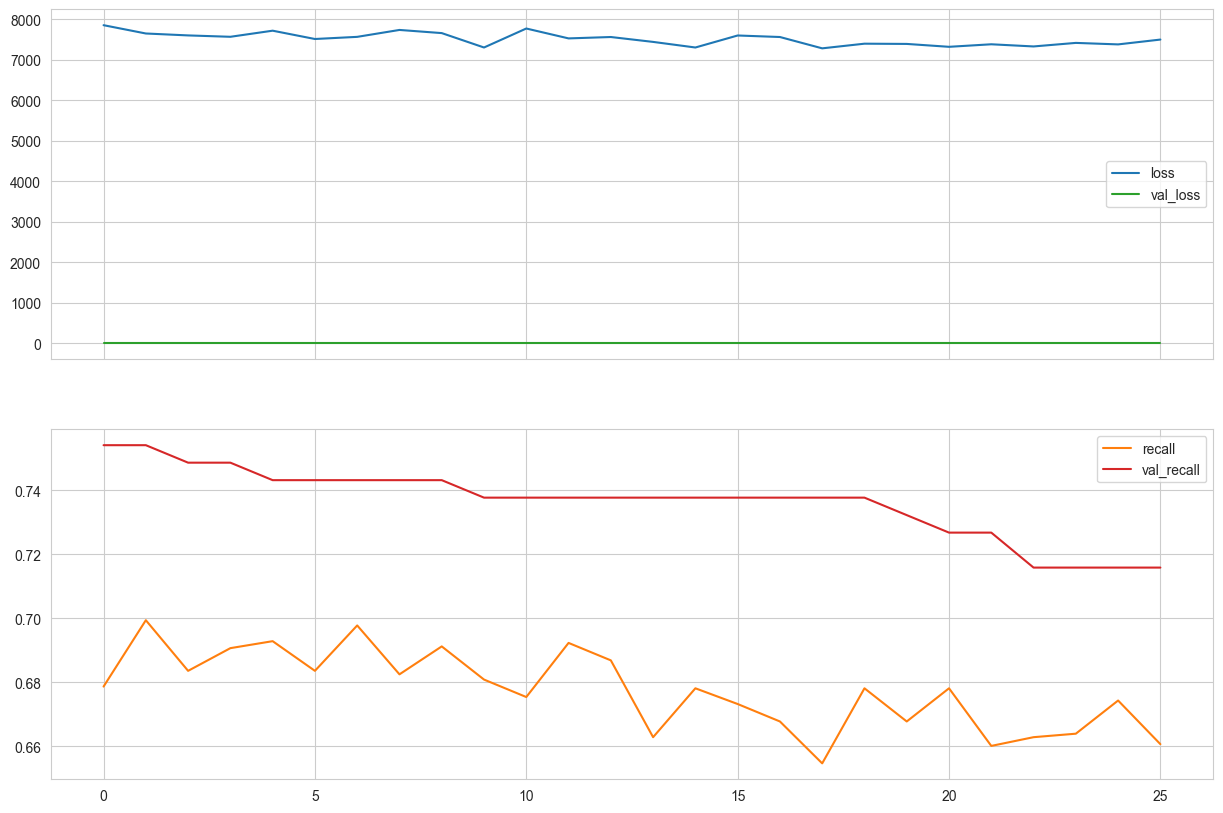

In [244]:
loss_df = pd.DataFrame(history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [245]:
y_pred = (opt_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[130 666]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.71      0.16      0.27       796
           1       0.19      0.75      0.30       204

    accuracy                           0.28      1000
   macro avg       0.45      0.45      0.28      1000
weighted avg       0.61      0.28      0.27      1000



32/32 [==============================] - 0s 1ms/step


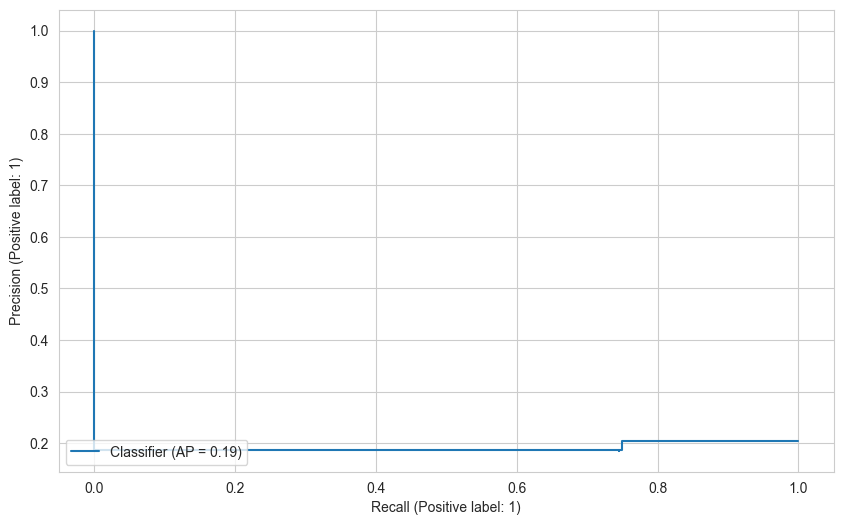

In [250]:
from sklearn.metrics import PrecisionRecallDisplay,precision_recall_curve

y_pred_proba = opt_model.predict(X_test)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba);

# Final Model and Model Deployment

In [204]:
import pickle

pickle.dump(scaler, open("scaler_bank_churn", 'wb'))


In [203]:
y_pred = balanced_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 979us/step
[[660 136]
 [ 63 141]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       796
           1       0.51      0.69      0.59       204

    accuracy                           0.80      1000
   macro avg       0.71      0.76      0.73      1000
weighted avg       0.83      0.80      0.81      1000



In [205]:
balanced_model.save('model_bank_churn.h5')

## Prediction

In [206]:
# load model
from tensorflow.keras.models import load_model

In [207]:
model_churn = load_model('model_bank_churn.h5')

scaler_churn = pickle.load(open("scaler_bank_churn", "rb"))

In [208]:
single_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
single_customer


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geog_germany,geog_spain,geog_france
0,619,1,42,2,0.000,1,1,1,101348.880,0,0,1


In [209]:
single_customer = scaler_churn.transform(single_customer)
single_customer

array([[0.538     , 1.        , 0.32432432, 0.2       , 0.        ,
        0.        , 1.        , 1.        , 0.50654122, 0.        ,
        0.        , 1.        ]])

In [210]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 72ms/step


array([[1]], dtype=int32)

In [226]:
df["Exited"].iloc[0]

1

## Comparison with ML

In [212]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, test_size=0.1, random_state=seed)

**Logistic regression**

In [222]:
from sklearn.linear_model import LogisticRegression

class_weights = {0: 1.0, 1: 10.0}  # Define class weights based on the imbalance

log_model = LogisticRegression(class_weight=sklearn_weights)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[514 282]
 [ 68 136]]
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       796
           1       0.33      0.67      0.44       204

    accuracy                           0.65      1000
   macro avg       0.60      0.66      0.59      1000
weighted avg       0.77      0.65      0.68      1000



**Random Forest**

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
rf_model = RandomForestClassifier(class_weight=sklearn_weights)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[769  27]
 [115  89]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.77      0.44      0.56       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



**Catboost**

In [223]:
from catboost import CatBoostClassifier

# Train the CatBoostClassifier model with early stopping
cat_model = CatBoostClassifier(iterations=1000, early_stopping_rounds=10, random_state=seed, class_weight=sklearn_weights,
                               learning_rate = 0.1, eval_metric='Recall', use_best_model=True)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Use the trained model to make predictions on the test set
y_pred = cat_model.predict(X_test)

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Use the trained model to make predictions on the test set
y_pred_train = cat_model.predict(X_train)

# Print the confusion matrix and classification report
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

ModuleNotFoundError: No module named 'catboost'

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___